In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

SAVE_PLOTS=True
STANDARD_DPI=300

In [2]:

def load_h5_data(filename):
    data = {}
    with h5py.File(filename, 'r') as f:
        for att in f.keys():
            data[int(att)] = {'CH1': [], 'CH2': []}

            for i in f[att]['CH1']:
                arr = np.array(f[att]['CH1'][i])  # Load as NumPy array
                df = pd.DataFrame(arr, columns=['t', 'V'])  # Convert to DataFrame
                data[int(att)]['CH1'].append(df)

            for i in f[att]['CH2']:
                arr = np.array(f[att]['CH2'][i])
                df = pd.DataFrame(arr, columns=['t', 'V'])
                data[int(att)]['CH2'].append(df)

    return data


In [5]:
signals_filepath = 'data\pmt_light_attenuation\signals_20250309-104658.h5'
signals = load_h5_data(signals_filepath)
keys = sorted(signals.keys())

In [6]:
def get_middle_waveform(key, channel):
    df = signals[key][channel]
    # take the five signals, measure their peak to peak values and pick the one in the middle
    peak_to_peak = np.array([df['V'].max() - df['V'].min() for df in df])
    middle_idx = np.argsort(peak_to_peak)[2]
    return df[middle_idx]

[]

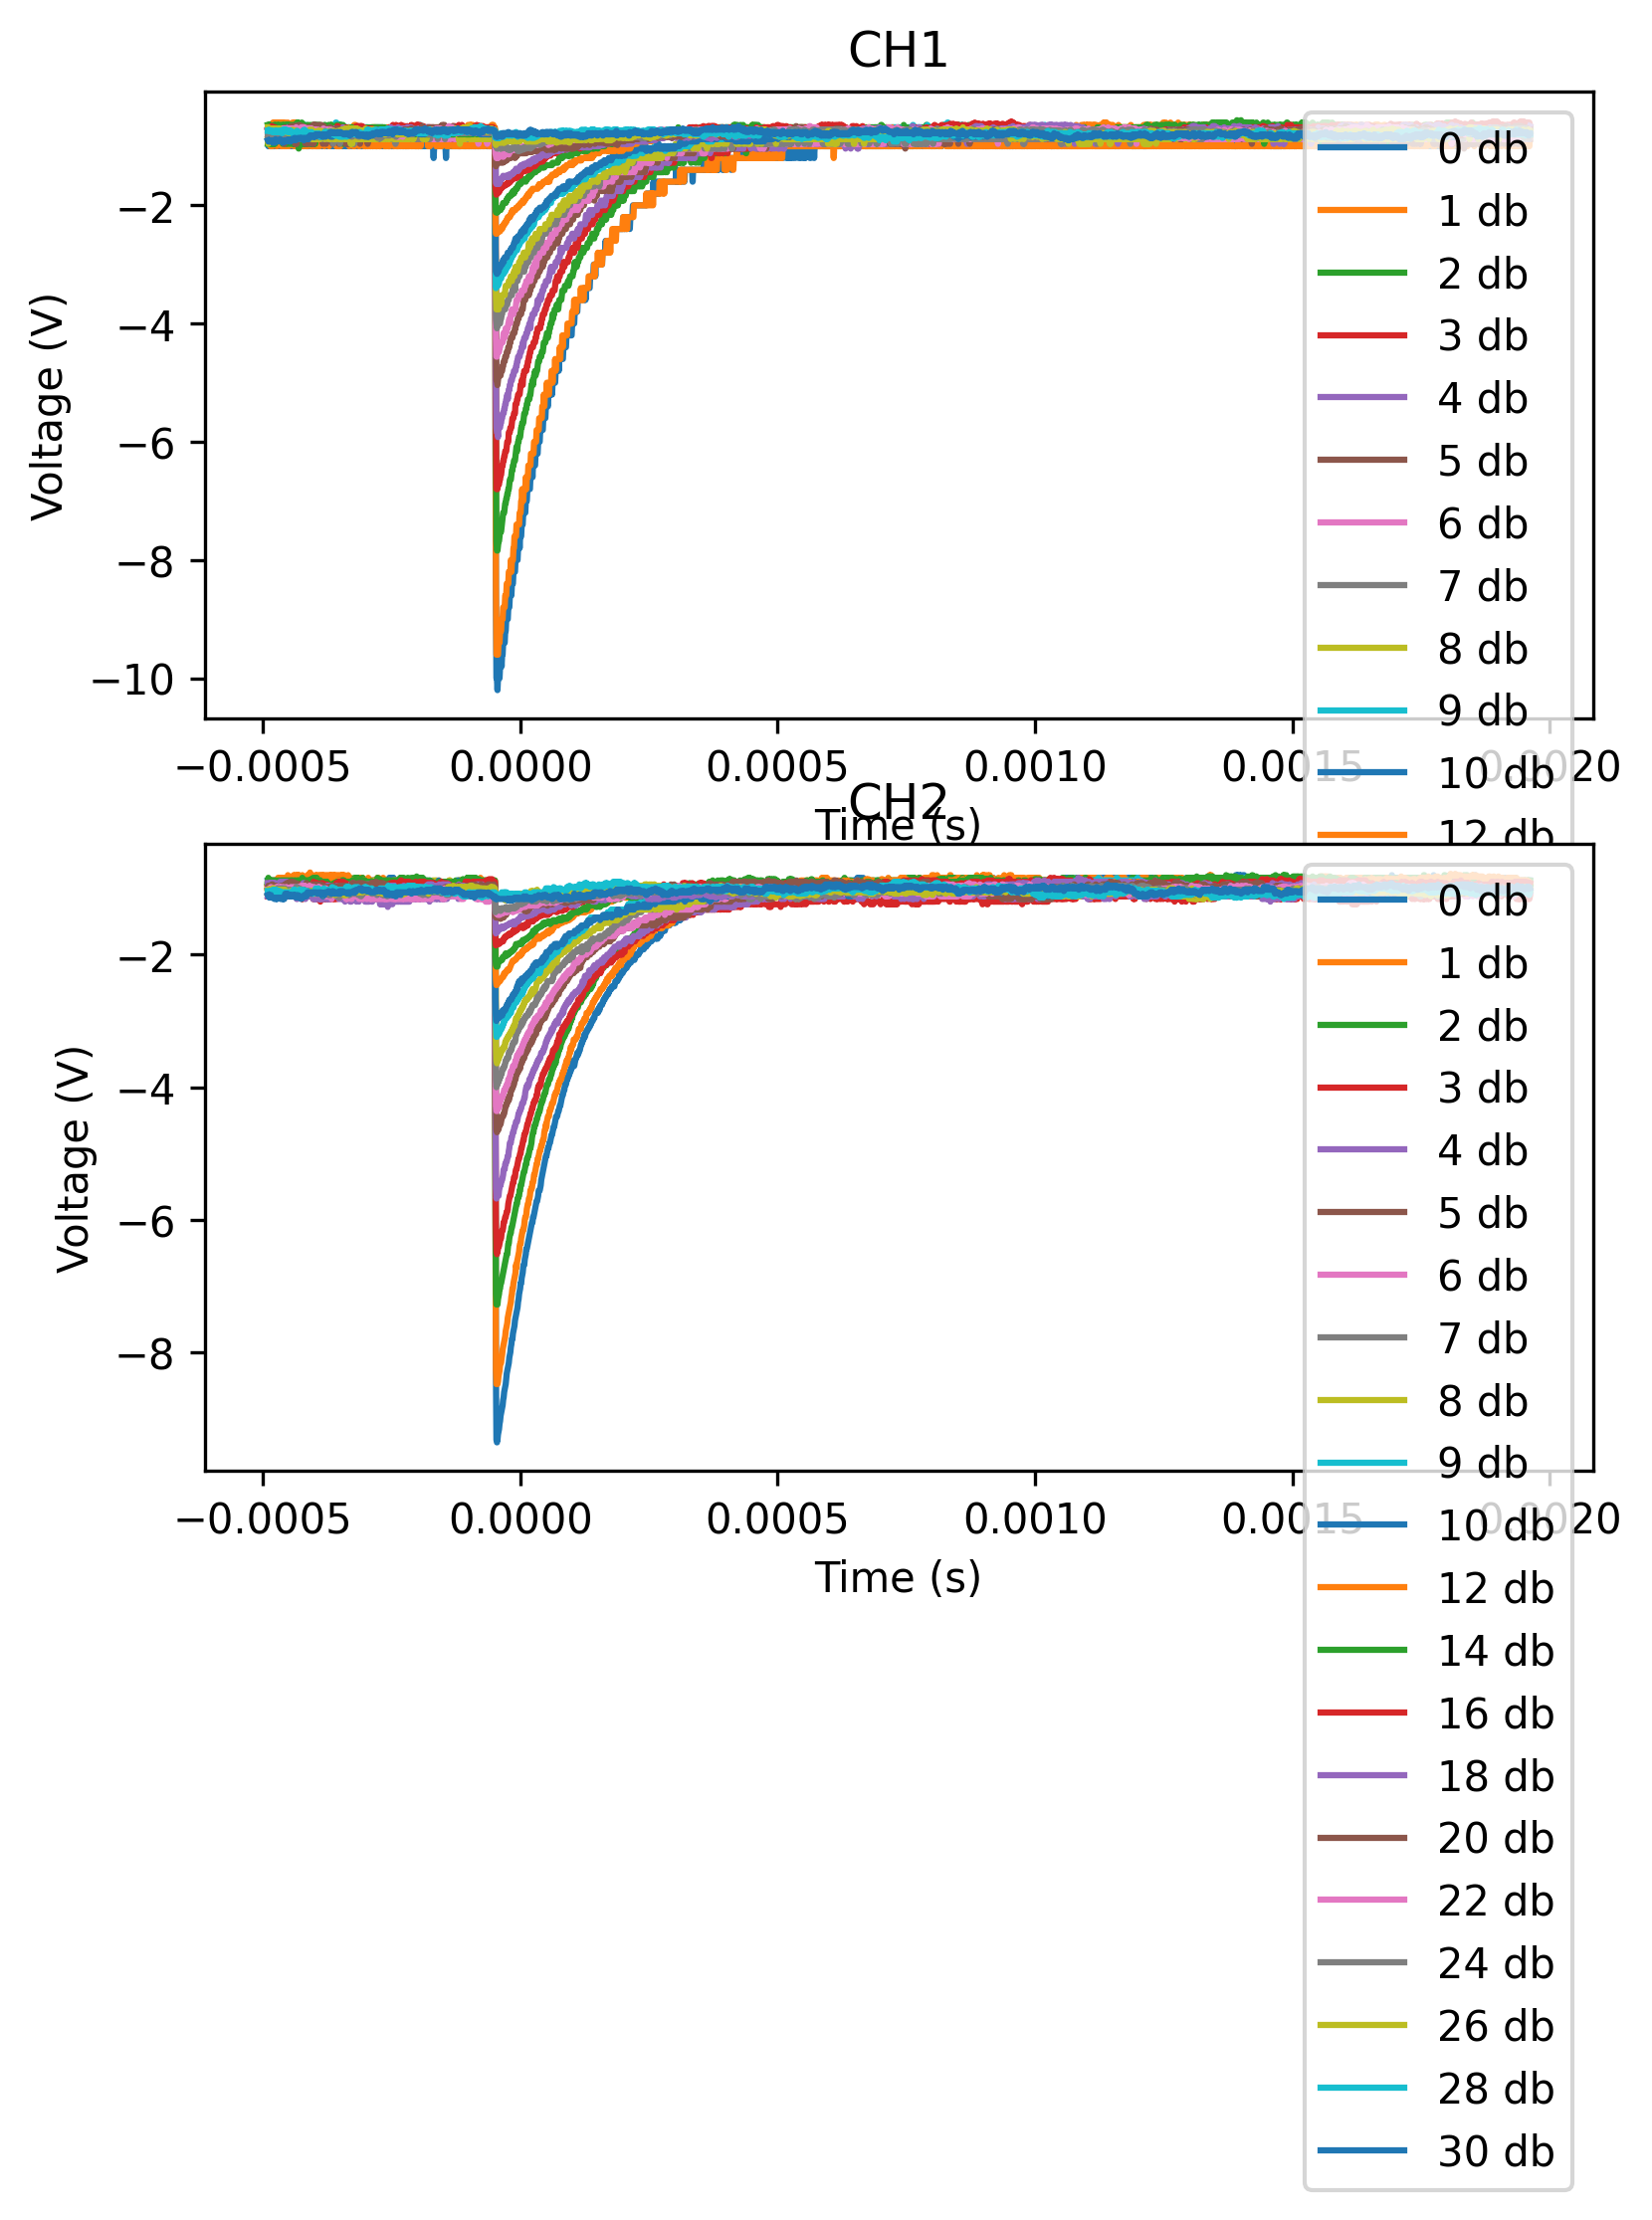

In [ ]:
def plot_waveforms(keys, save_path=None):
    fig, ax = plt.subplots(2, 1, figsize=(6, 6), dpi=STANDARD_DPI)

    for key in keys:
        w = get_middle_waveform(key, 'CH1')
        ax[0].plot(w['t'], w['V'], label=f'{key} db')
        ax[0].set_xlabel('Time (s)')
        ax[0].set_ylabel('Voltage (V)')
        ax[0].legend()
        ax[0].set_title('CH1')
    for key in keys:
        w = get_middle_waveform(key, 'CH2')
        ax[1].plot(w['t'], w['V'], label=f'{key} db')
        ax[1].set_xlabel('Time (s)')
        ax[1].set_ylabel('Voltage (V)')
        ax[1].legend()
        ax[1].set_title('CH2')
    plt.tight_layout()
    if SAVE_PLOTS and save_path is not None:
        plt.savefig(save_path, dpi=STANDARD_DPI, bbox_inches='tight')

    plt.plot()